In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os , shutil

##### Image Lenghts refer to `preparation.ipynb` in this directory

Test folder contains images 190 images with fire and 190 images images with No fire.
Train folder contains images 610 images with fire and 610 images images with No fire.

Validation folder contains images 150 images with fire and 150 images images with No fire. images

In [2]:
test_folder = os.path.join('data' , 'test')
train_folder = os.path.join('data', 'train')
val_folder = os.path.join('data','validation')


In [3]:
import time
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

In [4]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_folder,
    target_size=(64,64),
    batch_size=1220
    )

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder,
    target_size=(64,64),
    batch_size=380
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_folder,
    target_size=(64,64),
    batch_size=300
)

Found 1220 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
train_images , train_labels = next(train_generator)
test_images , test_labels = next(test_generator)
val_images , val_labels = next(val_generator)

In [6]:
print(train_images.shape , train_labels.shape)
print(test_images.shape , test_labels.shape)
print(val_images.shape , val_labels.shape)

(1220, 64, 64, 3) (1220, 2)
(380, 64, 64, 3) (380, 2)
(300, 64, 64, 3) (300, 2)


In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(f'train shape {train_img.shape} \ntest shape {test_img.shape} \nval shape {val_img.shape}')

train shape (1220, 12288) 
test shape (380, 12288) 
val shape (300, 12288)


In [8]:
train_y = np.reshape(train_labels[:,0] , (1220,1))
test_y = np.reshape(test_labels[:,0] , (380,1))
val_y = np.reshape(val_labels[:,0] , (300,1))

print(f'train shape {train_y.shape} \ntest shape {test_y.shape} \nval shape {val_y.shape}')

train shape (1220, 1) 
test shape (380, 1) 
val shape (300, 1)


In [9]:
from tensorflow.keras import layers , models
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam

In [10]:
input_shape = (12288,)
model = models.Sequential()

model.add(layers.Dense(150,activation='relu',input_shape=input_shape))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['acc'],loss='binary_crossentropy')
results = model.fit(
                    train_img,
                    train_y,
                    epochs=150,
                    batch_size=256,
                    validation_data=(val_img,val_y)
            )
print('\n\n')
acc1 = model.evaluate(train_img,train_y)
acc2 = model.evaluate(test_img,test_y)
print((f'Train: {acc1} || Test: {acc2}'))

Epoch 1/150
5/5 [==============================] - 0s 54ms/step - loss: 1.1258 - acc: 0.5910 - val_loss: 0.5744 - val_acc: 0.7400
Epoch 2/150
5/5 [==============================] - 0s 21ms/step - loss: 0.4151 - acc: 0.7926 - val_loss: 0.3946 - val_acc: 0.8667
Epoch 3/150
5/5 [==============================] - 0s 21ms/step - loss: 0.3230 - acc: 0.8574 - val_loss: 0.2970 - val_acc: 0.8900
Epoch 4/150
5/5 [==============================] - 0s 20ms/step - loss: 0.2749 - acc: 0.8893 - val_loss: 0.2767 - val_acc: 0.8867
Epoch 5/150
5/5 [==============================] - 0s 21ms/step - loss: 0.2404 - acc: 0.9049 - val_loss: 0.2725 - val_acc: 0.8733
Epoch 6/150
5/5 [==============================] - 0s 21ms/step - loss: 0.2221 - acc: 0.9107 - val_loss: 0.2545 - val_acc: 0.8933
Epoch 7/150
5/5 [==============================] - 0s 21ms/step - loss: 0.2085 - acc: 0.9180 - val_loss: 0.2285 - val_acc: 0.9133
Epoch 8/150
5/5 [==============================] - 0s 20ms/step - loss: 0.1803 - acc: 0.92

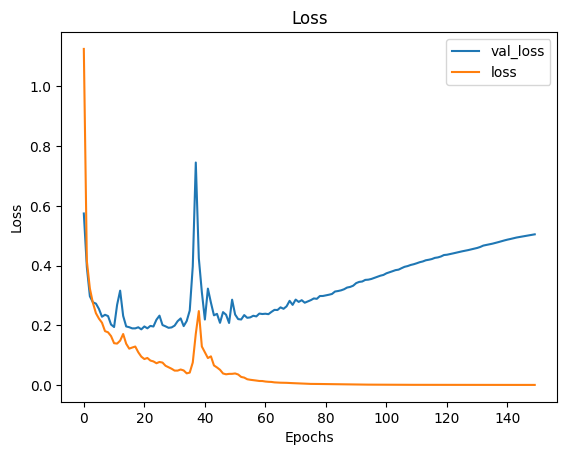

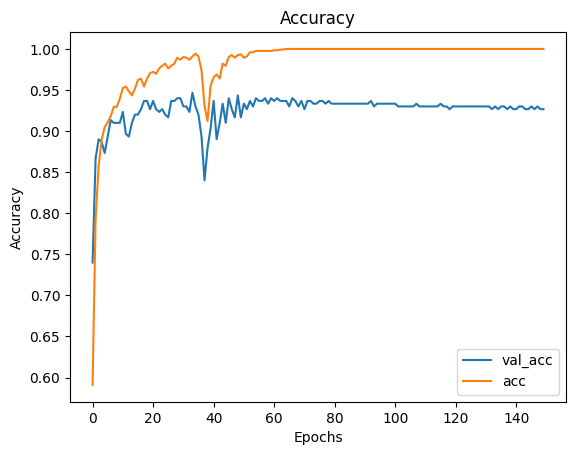

In [12]:
def visualize_training_results(results):
    plt.figure()
    plt.plot(results.history['val_loss'])
    plt.plot(results.history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(results.history['val_acc'])
    plt.plot(results.history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


visualize_training_results(results)

In [13]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(64,64,3)))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(64 , (4,4) , activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(256 , (3,3) , activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [15]:
results2 = cnn_model.fit(
        train_images,
        train_y,
        epochs = 35,
        batch_size = 256,
        validation_data=(val_images,val_y)
    )

Epoch 1/35
5/5 [==============================] - 4s 720ms/step - loss: 0.5597 - acc: 0.7525 - val_loss: 0.2781 - val_acc: 0.8800
Epoch 2/35
5/5 [==============================] - 3s 671ms/step - loss: 0.3807 - acc: 0.8508 - val_loss: 0.4585 - val_acc: 0.8567
Epoch 3/35
5/5 [==============================] - 4s 702ms/step - loss: 0.3115 - acc: 0.8877 - val_loss: 0.2128 - val_acc: 0.9167
Epoch 4/35
5/5 [==============================] - 3s 682ms/step - loss: 0.2092 - acc: 0.9213 - val_loss: 0.2038 - val_acc: 0.9233
Epoch 5/35
5/5 [==============================] - 3s 695ms/step - loss: 0.1944 - acc: 0.9344 - val_loss: 0.1807 - val_acc: 0.9367
Epoch 6/35
5/5 [==============================] - 4s 767ms/step - loss: 0.1506 - acc: 0.9393 - val_loss: 0.1652 - val_acc: 0.9400
Epoch 7/35
5/5 [==============================] - 4s 792ms/step - loss: 0.1294 - acc: 0.9598 - val_loss: 0.1670 - val_acc: 0.9367
Epoch 8/35
5/5 [==============================] - 4s 802ms/step - loss: 0.1207 - acc: 0.95

In [16]:
acc1 = cnn_model.evaluate(train_images,train_y)
acc2 = cnn_model.evaluate(test_images,test_y)
print((f'Train: {acc1}\nTest: {acc2}'))

12/12 [==============================] - 0s 23ms/step - loss: 0.1883 - acc: 0.9474
Train: [0.02376353181898594, 0.9918032884597778]
Test: [0.18829534947872162, 0.9473684430122375]


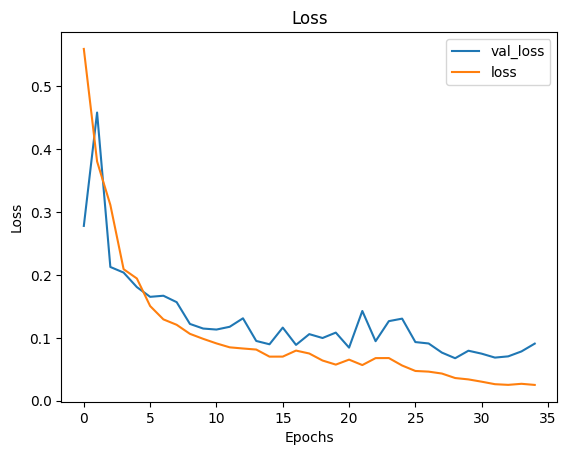

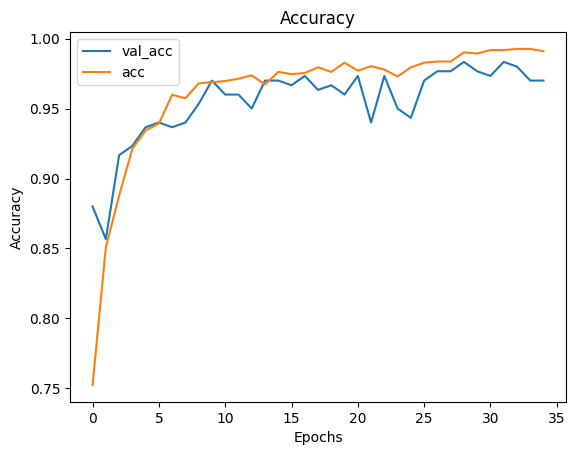

In [17]:
def visualize_training_results(results):
    plt.figure()
    plt.plot(results.history['val_loss'])
    plt.plot(results.history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(results.history['val_acc'])
    plt.plot(results.history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


visualize_training_results(results2)

In [18]:
train_new_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

train_generator = train_new_gen.flow_from_directory(
    train_folder,
    target_size=(64,64),
    batch_size=1220,
    class_mode = 'binary'
    )

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_folder,
    target_size=(64,64),
    batch_size=380,
    class_mode = 'binary'
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_folder,
    target_size=(64,64),
    batch_size=300,
    class_mode = 'binary'
)

Found 1220 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [19]:
aug = models.Sequential()
aug.add(layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(64,64,3)))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Conv2D(64 , (4,4) , activation='relu'))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Conv2D(128 , (3,3) , activation='relu'))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Conv2D(256 , (3,3) , activation='relu'))
aug.add(layers.MaxPool2D((2,2)))

aug.add(layers.Flatten())
aug.add(layers.Dense(64, activation='relu'))
aug.add(layers.Dense(1, activation='sigmoid'))

In [20]:
aug.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [21]:
aug.fit(
    train_generator,
    epochs=30,
    validation_data = val_generator
)

Epoch 1/30
1/1 [==============================] - 16s 16s/step - loss: 0.6877 - acc: 0.5000 - val_loss: 0.6857 - val_acc: 0.5000
Epoch 2/30
1/1 [==============================] - 6s 6s/step - loss: 0.6868 - acc: 0.5008 - val_loss: 0.6846 - val_acc: 0.5000
Epoch 3/30
1/1 [==============================] - 1s 553ms/step - loss: 0.6857 - acc: 0.4992 - val_loss: 0.6836 - val_acc: 0.5000
Epoch 4/30
1/1 [==============================] - 1s 561ms/step - loss: 0.6847 - acc: 0.5008 - val_loss: 0.6826 - val_acc: 0.5000
Epoch 5/30
1/1 [==============================] - 1s 593ms/step - loss: 0.6838 - acc: 0.5033 - val_loss: 0.6816 - val_acc: 0.5000
Epoch 6/30
1/1 [==============================] - 1s 582ms/step - loss: 0.6826 - acc: 0.5066 - val_loss: 0.6806 - val_acc: 0.5100
Epoch 7/30
1/1 [==============================] - 1s 582ms/step - loss: 0.6819 - acc: 0.5131 - val_loss: 0.6796 - val_acc: 0.5200
Epoch 8/30
1/1 [==============================] - 1s 539ms/step - loss: 0.6808 - acc: 0.5287 -

In [22]:
acc1 = aug.evaluate(train_generator)
acc2 = aug.evaluate(test_generator)
print((f'Train: {acc1}\nTest: {acc2}'))

1/1 [==============================] - 0s 999us/step - loss: 0.6636 - acc: 0.7395
Train: [0.658092737197876, 0.8049180507659912]
Test: [0.6635946035385132, 0.7394737005233765]


#### Out of the three Models , the results of the cnn_model without augmentation are promising, indicating that the model has learned meaningful patterns from the training data and can make accurate predictions on new instances.


In [43]:
# Saving the model
cnn_model.save('dep_model.h5')
print("Model saved successfully!")

Model saved successfully!
